In [1]:
import pandas as pd
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# data load

In [2]:
data = pd.read_csv('./data/colorspace_tras.csv')
data.head()

,Top_RGB_R,Top_RGB_G,Top_RGB_B,Bot_RGB_R,Bot_RGB_G,Bot_RGB_B,Top_YUV_Y,Top_YUV_U,Top_YUV_V,Bot_YUV_Y,...,Bot_LAB_L,Bot_LAB_A,Bot_LAB_B,Top_hls_H,Top_hls_L,Top_hls_S,Bot_hls_H,Bot_hls_L,Bot_hls_S,Thickness
0,11.5760,10.8832,8.1364,30.2140,37.7740,50.4468,10.8832,126.6404,128.6928,37.0204,...,37.9392,128.6176,118.6128,22.0552,10.0796,48.2524,108.7624,40.5660,64.2544,48.266667
1,12.4712,12.6248,11.2136,25.9992,34.8912,43.0424,12.5096,127.3584,127.9616,33.1272,...,33.6496,126.7188,121.4292,23.5584,11.9808,19.2812,104.2764,34.6176,63.2720,47.966667
2,12.7704,12.7176,9.9168,31.3148,35.7876,41.8260,12.5384,126.7120,128.2320,35.1444,...,35.5236,127.6692,123.3704,29.7648,11.5876,36.0004,107.4464,36.5932,36.9364,48.166667
3,11.2308,11.4564,8.8540,24.8812,32.4324,39.4952,11.1748,126.9128,128.0560,31.0332,...,30.6900,126.8772,122.1940,26.6792,10.3208,38.6628,104.4104,32.3344,58.2892,48.600000
4,5.4696,3.2120,1.4352,26.0116,32.5420,38.0564,3.6852,126.9400,129.7764,31.2852,...,30.9328,126.7972,123.3564,30.1924,3.4992,183.6056,104.3064,32.1788,48.6532,59.533333


In [4]:
data.columns

Index(['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B', 'Bot_RGB_R', 'Bot_RGB_G',
       'Bot_RGB_B', 'Top_YUV_Y', 'Top_YUV_U', 'Top_YUV_V', 'Bot_YUV_Y',
       'Bot_YUV_U', 'Bot_YUV_V', 'Top_HSV_H', 'Top_HSV_S', 'Top_HSV_V',
       'Bot_HSV_H', 'Bot_HSV_S', 'Bot_HSV_V', 'Top_LAB_L', 'Top_LAB_A',
       'Top_LAB_B', 'Bot_LAB_L', 'Bot_LAB_A', 'Bot_LAB_B', 'Top_hls_H',
       'Top_hls_L', 'Top_hls_S', 'Bot_hls_H', 'Bot_hls_L', 'Bot_hls_S',
       'Thickness'],
      dtype='object')

# catboost로 테스트

In [3]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

import pandas as pd


https://catboost.ai/en/docs/concepts/parameter-tuning

Number of trees (--iterations) : 구축할 수 있는 최대 트리 수
Learning rate (learning_rate)
Tree depth (depth) : 대부분의 경우 최적의 깊이 범위는 4~10입니다. 6~10 범위의 값이 권장
n_estimators
iterations

In [ ]:
results = {}
model_name_list= []
model_parameter_lsit = []

In [4]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_G', 'Top_RGB_B', 'Top_YUV_Y']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RMSE 스코어링 함수
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# CatBoost 회귀 모델 설정
cb_reg = CatBoostRegressor(verbose=0)

# 하이퍼 파라미터 그리드 설정
param_grid = {'--iterations': Integer(50, 500),
              'depth': Integer(1, 8), 
              'learning_rate': Real(0.01, 1.0, 'log-uniform')}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(cb_reg, param_distributions=param_grid, n_iter=50, cv=5, 
                                   scoring=rmse_scorer, random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

results= {
            "used data feature": list(X.columns),
            "model": model_name_list.append(cb_reg),
            "model parameter": model_parameter_lsit.append(bayes_search.best_params_),
            "y_test.values": list(y_test.values),
            "y_pred": list(y_pred),
            "mse": (mean_squared_error(y_test, y_pred)),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))
        }

best_params, rmse

({'learning_rate': 0.1, 'iterations': 200, 'depth': 5}, 4.178850232181157)

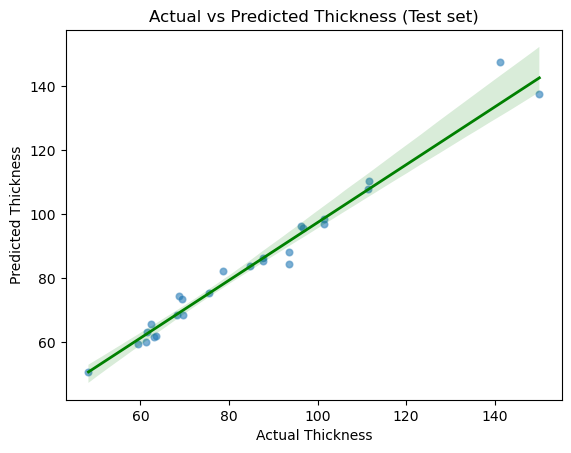

In [5]:
# 그래프 그리기
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [6]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_G', 'Top_RGB_B', 'Top_YUV_Y', 'Top_YUV_V', 'Top_HSV_V', 'Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CatBoost 회귀 모델 설정
cb_reg = CatBoostRegressor(verbose=0)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'iterations': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'depth': [3, 5, 7, 9, 11, 13]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(cb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'learning_rate': 0.1, 'iterations': 200, 'depth': 3}, 9.2055733649425)

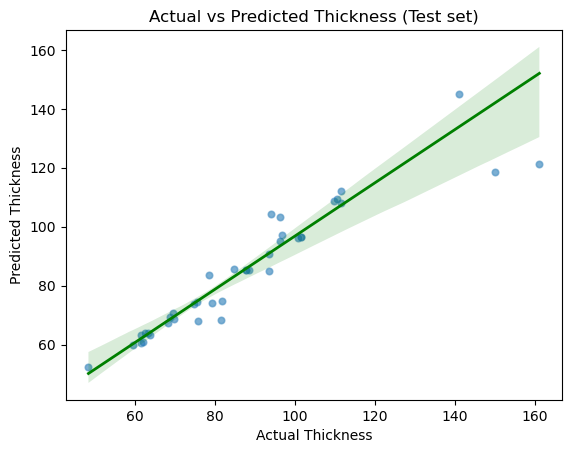

In [7]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [8]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B', 'Top_YUV_U', 'Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 회귀 모델 설정
cb_reg = CatBoostRegressor(verbose=0)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'iterations': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'depth': [3, 5, 7, 9, 11, 13]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(cb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse


({'learning_rate': 0.1, 'iterations': 200, 'depth': 5}, 4.27789387505807)

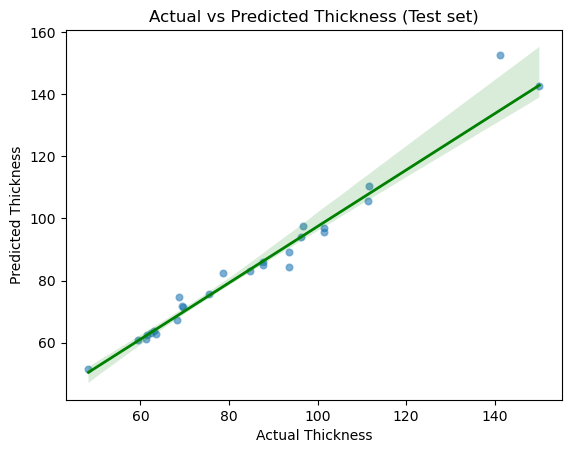

In [9]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [10]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B', 'Top_YUV_Y', 'Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 회귀 모델 설정
cb_reg = CatBoostRegressor(verbose=0)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'iterations': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'depth': [3, 5, 7, 9, 11, 13]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(cb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse


({'learning_rate': 0.5, 'iterations': 100, 'depth': 5}, 4.983727769808961)

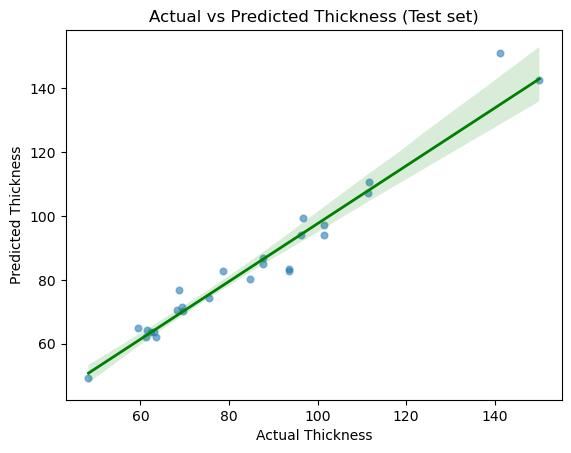

In [11]:
# Plotting the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [12]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 회귀 모델 설정
cb_reg = CatBoostRegressor(verbose=0)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'iterations': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'depth': [3, 5, 7, 9, 11, 13]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(cb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'learning_rate': 0.1, 'iterations': 400, 'depth': 13}, 4.796794994883192)

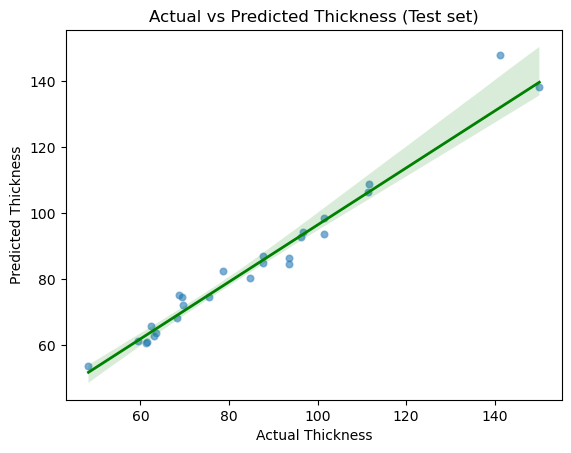

In [13]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [14]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_R', 'Top_RGB_G', 'Top_RGB_B','Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 회귀 모델 설정
cb_reg = CatBoostRegressor(verbose=0)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'iterations': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'depth': [3, 5, 7, 9, 11, 13]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(cb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'learning_rate': 0.5, 'iterations': 100, 'depth': 7}, 4.9711193939089435)

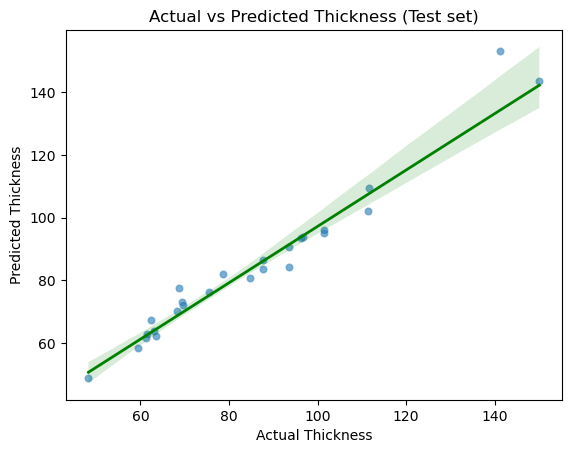

In [15]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()

In [16]:
# 선택된 피처를 사용하여 데이터를 나눕니다.
X = data[['Top_RGB_G', 'Top_HSL_S','Top_LAB_L']]
y = data['Thickness']

# 훈련과 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 회귀 모델 설정
cb_reg = CatBoostRegressor(verbose=0)

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'iterations': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'depth': [3, 5, 7, 9, 11, 13]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼 파라미터 찾기
random_search = RandomizedSearchCV(cb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = random_search.best_params_

# 최적의 모델로 예측
y_pred = random_search.predict(X_test)

# 테스트 세트에서의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_params, rmse

({'learning_rate': 0.1, 'iterations': 200, 'depth': 3}, 4.947317533679435)

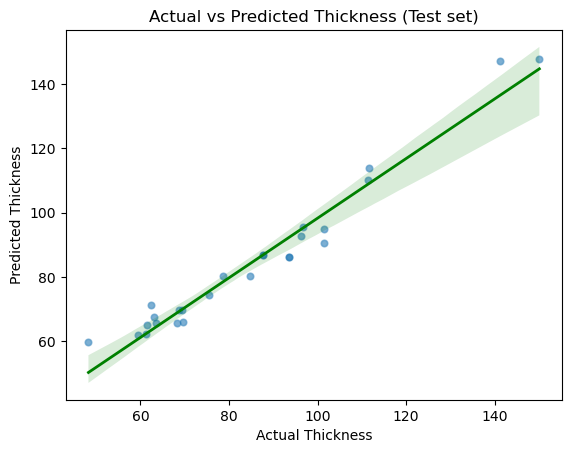

In [17]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, robust=True)

plt.xlabel('Actual Thickness')
plt.ylabel('Predicted Thickness')
plt.title('Actual vs Predicted Thickness (Test set)')
plt.show()